In [22]:
import tensorflow as tf
import skimage.io as imd
import numpy
import os

In [18]:
def load_ml_data(data_directory):
    dirs=[d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]
    
    labels=[]
    images=[]
    for d in dirs:
        label_dirs=os.path.join(data_directory,d)
        file_names=[os.path.join(label_dirs,imgName) for imgName in os.listdir(label_dirs) if imgName.endswith(".ppm")]
        for imgName in file_names:
            images.append(imd.imread(imgName))
            labels.append(int(d))
    return images, labels
    

In [19]:
main_dir="D:/Estudiar/MLData/belgian/"
train_data_dir=os.path.join(main_dir,"Training")
test_data_dir=os.path.join(main_dir,"Testing")


In [20]:
images, labels=load_ml_data(train_data_dir)

In [25]:
images=numpy.array(images,dtype=object)
labels=numpy.array(labels)

In [29]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [31]:
len(set(labels))

62

In [32]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [35]:
images.nbytes/images.itemsize

4575.0

In [36]:
import matplotlib.pyplot as plt 

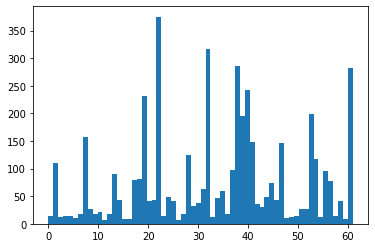

In [37]:
plt.hist(labels,len(set(labels)))
plt.show()

In [38]:
import random

In [39]:
rand_signs=random.sample(range(0,len(labels)),6)

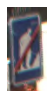

Format:(98, 46, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE8377EB10>, max:<built-in method max of numpy.ndarray object at 0x000002BE8377EB10>


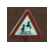

Format:(74, 84, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE8309FE10>, max:<built-in method max of numpy.ndarray object at 0x000002BE8309FE10>


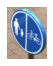

Format:(259, 196, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE834AEB10>, max:<built-in method max of numpy.ndarray object at 0x000002BE834AEB10>


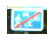

Format:(56, 80, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE8353C2D0>, max:<built-in method max of numpy.ndarray object at 0x000002BE8353C2D0>


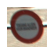

Format:(105, 103, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE833D3390>, max:<built-in method max of numpy.ndarray object at 0x000002BE833D3390>


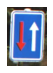

Format:(144, 96, 3), min:<built-in method min of numpy.ndarray object at 0x000002BE8352BB10>, max:<built-in method max of numpy.ndarray object at 0x000002BE8352BB10>


In [45]:
for i in range(len(rand_signs)):
    temp_im=images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Format:{0}, min:{1}, max:{2}".format(temp_im.shape,temp_im.min,temp_im.max))

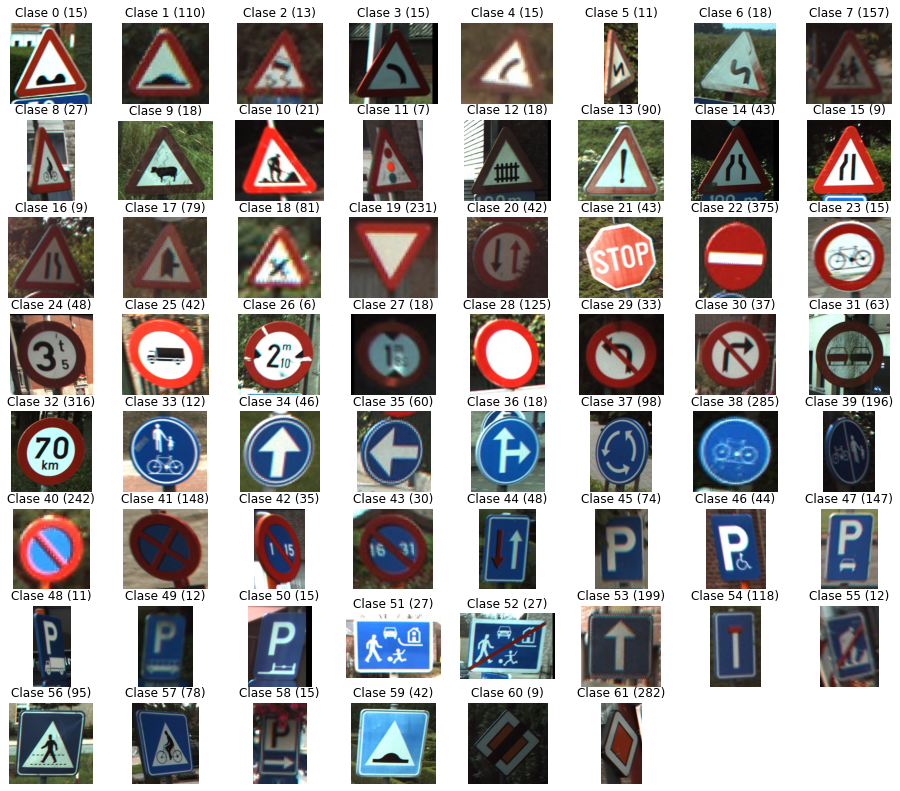

In [63]:
unique_labels=set(labels)
plt.figure(figsize=(16,14))
i=1
for label in unique_labels:
    temp_im=images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(labels).count(label)))
    i=i+1
    plt.imshow(temp_im)

In [64]:
#Modelo de Red Neuronal con TensorFlow

In [65]:
from skimage import transform

In [69]:
w=9999
h=9999
for image in images:
    if image.shape[0]<h:
        h=image.shape[0]
    if image.shape[1]<w:
        w=image.shape[1]
print("Tamaño minimo: {0}x{1}".format(h,w))

Tamaño minimo: 22x20


In [70]:
images30=[transform.resize(image,(30,30)) for image in images]

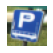

Format:(30, 30, 3), min:0.11372549019607843, max:0.9921568627450981


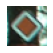

Format:(30, 30, 3), min:0.04337254901960791, max:0.9921568627450981


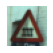

Format:(30, 30, 3), min:0.09019607843137255, max:0.9137254901960785


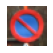

Format:(30, 30, 3), min:0.08823529411764705, max:0.9882352941176471


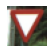

Format:(30, 30, 3), min:0.06936274509803919, max:0.996078431372549


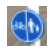

Format:(30, 30, 3), min:0.07058823529411765, max:0.996078431372549


In [72]:
rand_signs=random.sample(range(0,len(labels)),6)
for i in range(len(rand_signs)):
    temp_im=images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Format:{0}, min:{1}, max:{2}".format(temp_im.shape,temp_im.min(),temp_im.max()))

In [73]:
from skimage.color import rgb2gray

In [74]:
images30=numpy.array(images30)
images30=rgb2gray(images30)

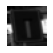

Format:(30, 30), min:0.05552686274509815, max:0.9589496928104578


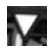

Format:(30, 30), min:0.06919373594771241, max:0.9523132549019607


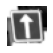

Format:(30, 30), min:0.23999966535947706, max:0.996078431372549


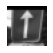

Format:(30, 30), min:0.0, max:0.9923906535947713


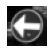

Format:(30, 30), min:0.005388823529411775, max:0.9676082483660132


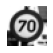

Format:(30, 30), min:0.09425046296296295, max:0.996078431372549


In [76]:
rand_signs=random.sample(range(0,len(labels)),6)
for i in range(len(rand_signs)):
    temp_im=images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im,cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Format:{0}, min:{1}, max:{2}".format(temp_im.shape,temp_im.min(),temp_im.max()))

In [91]:
x=tf.placeholder(dtype=tf.float32,shape=[None,30,30])
y=tf.placeholder(dtype=tf.int32,shape=[None])

images_flat=tf.contrib.layers.flatten(x)
logits=tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

train_opt=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred=tf.arg_max(logits,1)

accuracy=tf.reduce_mean(tf.cast(final_pred,tf.float32))

In [144]:
tf.set_random_seed(1234)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(400):
    _, accuracy_val=sess.run([train_opt,accuracy], feed_dict={x:images30,y:list(labels)})
    #_, loss_val=sess.run([train_opt,loss], feed_dict={x:images30,y:list(labels)})
    
    if i%20==0:
        print("EPOCH",i)
        print("Eficacia: ",accuracy_val)
        print("perdidas: ",loss_val)
    #print("Fin del Epoch ",i)

EPOCH 0
Eficacia:  21.141857
perdidas:  1.8254007
EPOCH 20
Eficacia:  34.90645
perdidas:  1.8254007
EPOCH 40
Eficacia:  33.91388
perdidas:  1.8254007
EPOCH 60
Eficacia:  34.0059
perdidas:  1.8254007
EPOCH 80
Eficacia:  33.94907
perdidas:  1.8254007
EPOCH 100
Eficacia:  33.78907
perdidas:  1.8254007
EPOCH 120
Eficacia:  33.770927
perdidas:  1.8254007
EPOCH 140
Eficacia:  33.602406
perdidas:  1.8254007
EPOCH 160
Eficacia:  33.61071
perdidas:  1.8254007
EPOCH 180
Eficacia:  33.585793
perdidas:  1.8254007
EPOCH 200
Eficacia:  33.615738
perdidas:  1.8254007
EPOCH 220
Eficacia:  33.588634
perdidas:  1.8254007
EPOCH 240
Eficacia:  33.56765
perdidas:  1.8254007
EPOCH 260
Eficacia:  33.458797
perdidas:  1.8254007
EPOCH 280
Eficacia:  33.443714
perdidas:  1.8254007
EPOCH 300
Eficacia:  33.452896
perdidas:  1.8254007
EPOCH 320
Eficacia:  33.453114
perdidas:  1.8254007
EPOCH 340
Eficacia:  33.43344
perdidas:  1.8254007
EPOCH 360
Eficacia:  33.398907
perdidas:  1.8254007
EPOCH 380
Eficacia:  33.359

In [145]:
#Evaluacion de la red neuronal
sample_idx=random.sample(range(len(images30)),40)
sample_images=[images30[i] for i in sample_idx]
sample_labels=[labels[i] for i in sample_idx]

In [146]:
prediction=sess.run([final_pred],feed_dict={x:sample_images,y:sample_labels})

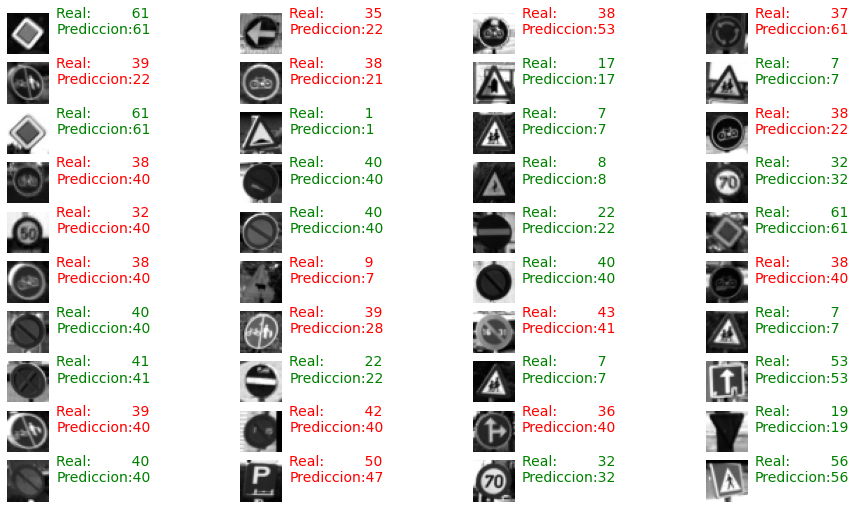

In [147]:
plt.figure(figsize=(16,9))
for i in range(len(sample_labels)):
    truth=sample_labels[i]
    predi=prediction[0][i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color="green" if truth==predi else "red"
    plt.text(35,15,"Real:         {0}\nPrediccion:{1}".format(truth,predi),fontsize=14,color=color)
    plt.imshow(sample_images[i],cmap="gray")
plt.show()

In [125]:
prediction

[array([ 7, 40, 22, 22, 40, 32, 40, 32, 28, 22, 24, 47, 40,  1, 28, 34],
       dtype=int64)]

In [148]:
test_images, test_labels=load_ml_data(test_data_dir)

In [149]:
test_images30=[transform.resize(im,(30,30)) for im in test_images]

In [150]:
test_images30=rgb2gray(numpy.array(test_images30))

In [151]:
prediction=sess.run([final_pred],feed_dict={x:test_images30})[0]


In [152]:
match_count=sum([int(lo==lp) for lo,lp in zip(test_labels,prediction)])
match_count

1581

In [153]:
acc=match_count/len(test_labels)*100
print("La eficiencia del modelo es {0}".format(acc))
#62.76

La eficiencia del modelo es 62.763001190948785
